In [4]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_excel("Online Retail.xlsx")


In [6]:
df = df.drop_duplicates()
df = df.dropna()

In [8]:
selected_features = ['Quantity', 'UnitPrice', 'CustomerID']
X = df[selected_features]

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

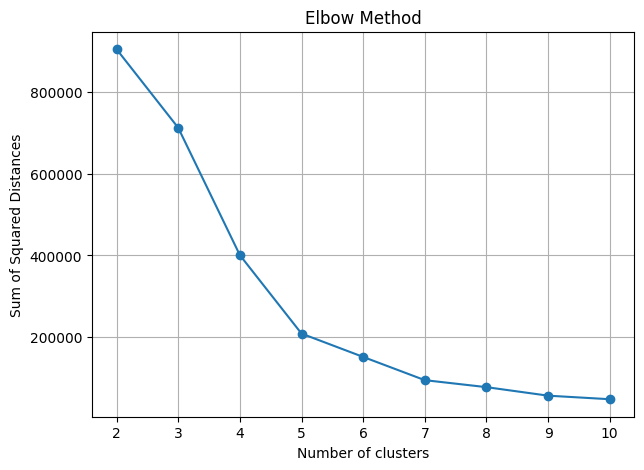

In [15]:
def determine_optional_clusters(X_scaled, max_clusters=10):
    distances = []

    for n in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans.fit(X_scaled)
        distances.append(kmeans.inertia_)

    plt.figure(figsize=(7,5))
    plt.plot(range(2, max_clusters+1), distances, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of Squared Distances')
    plt.xticks(range(2, max_clusters+1))
    plt.grid(True)
    plt.show()

    return distances

distances = determine_optional_clusters(X_scaled)

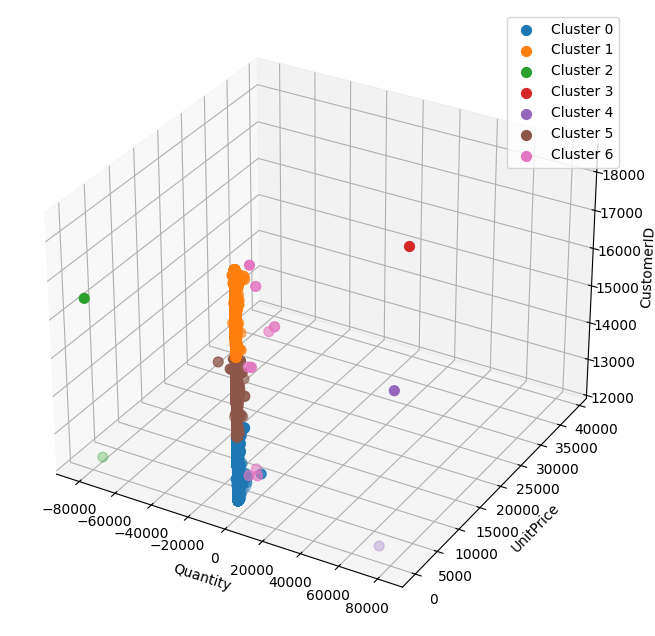

In [26]:
choosen_clusters = 7
kmeans = KMeans(n_clusters=choosen_clusters, random_state=42)
kmeans.fit(X_scaled)

clusters_labels = kmeans.labels_
df['cluster'] = clusters_labels
fig = plt.figure(figsize=(12, 8 ))
ax = fig.add_subplot(111, projection = '3d')

for cluster in range (choosen_clusters):
    cluster_data = df[df['cluster'] == cluster]
    ax.scatter(cluster_data['Quantity'], cluster_data['UnitPrice'], cluster_data['CustomerID'], label = f'Cluster {cluster}', s=50)

ax.set_xlabel('Quantity')
ax.set_ylabel('UnitPrice')
ax.set_zlabel('CustomerID')
ax.legend()
plt.show()


In [ ]:
#plot unsing Seaborn
#Centeriod for 3D plotting